# MICROBENCH: Benching latency and energy usage in dl operations

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## BATCH SIZE

In [13]:
CSV_FILE = "./tmp/linear_latency_results_batch_size.csv"
METRIC = "batch_size"
MAX_METRIC_VALUE = 300

df = pd.read_csv(CSV_FILE)
df

,batch_size,Avg Latency (ms)
0,1,0.084410
1,2,0.076278
2,3,0.091475
3,4,0.092006
4,5,0.093056
...,...,...
251,252,0.476893
252,253,0.475795
253,254,0.476902
254,255,0.477136


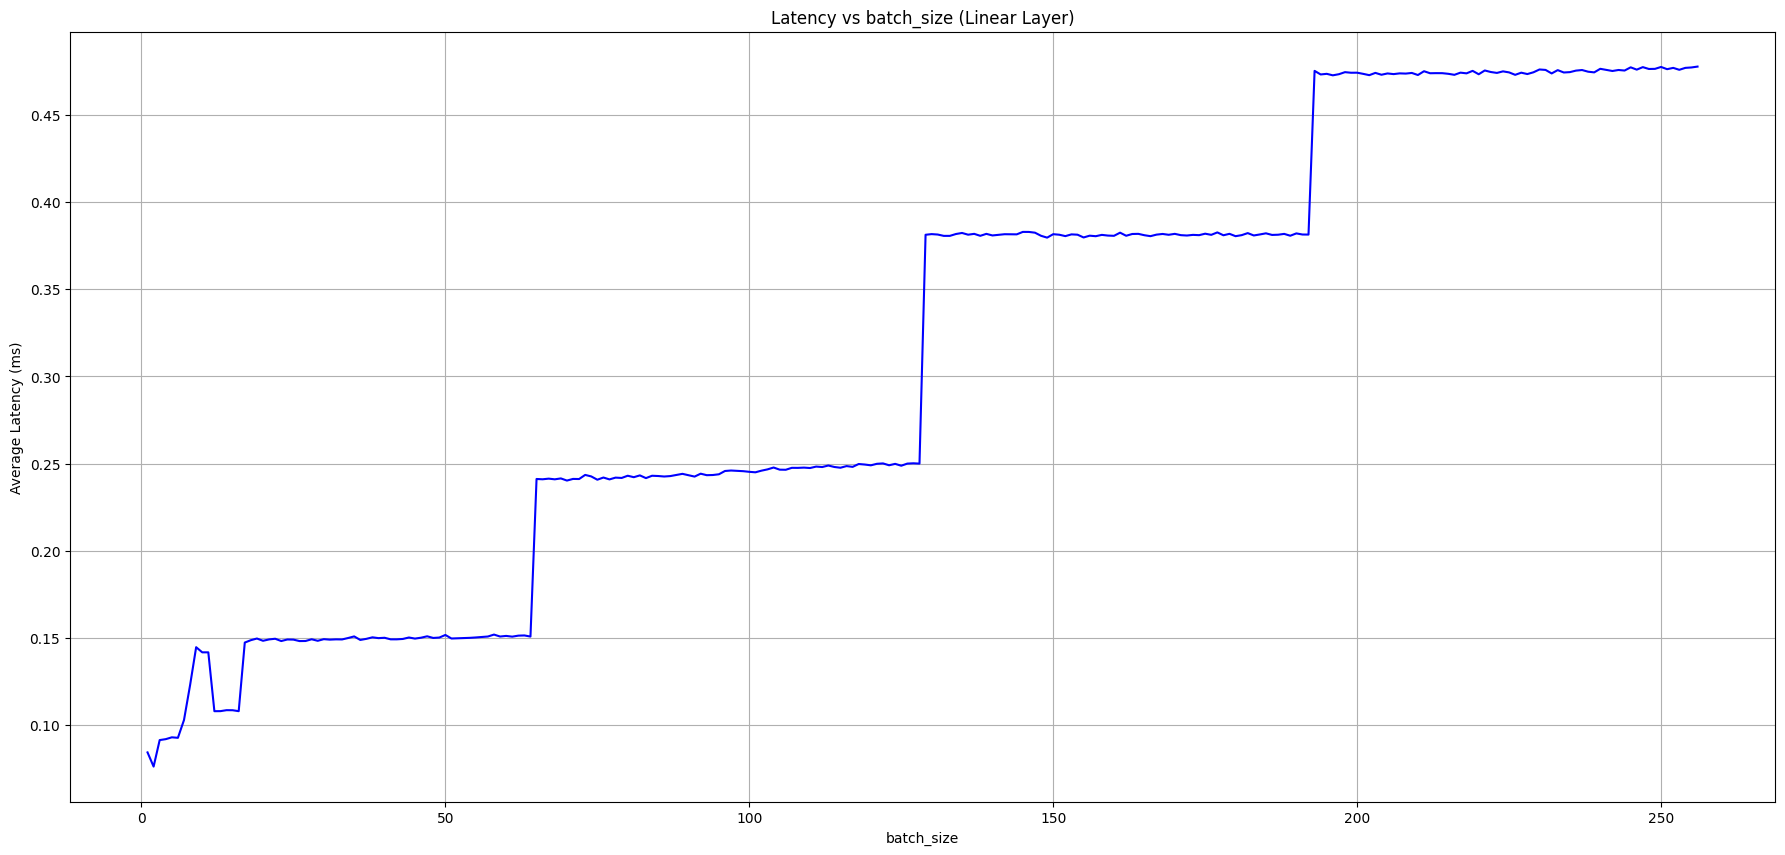

In [15]:
df = df[df[METRIC] < MAX_METRIC_VALUE]
metric = df[METRIC].values
avg_latencies = df["Avg Latency (ms)"].values


plt.figure(figsize=(22, 10))
plt.plot(metric, avg_latencies, linestyle='-', color='b')
plt.xlabel(METRIC)
plt.ylabel("Average Latency (ms)")
plt.title(f"Latency vs {METRIC} (Linear Layer)")
plt.grid(True)
#plt.savefig(f"{NAME_OUTPUT}.png")
plt.show()


## SEQUENCE LENGTH

In [17]:
CSV_FILE = "./tmp/linear_latency_results_seq_length.csv"
METRIC = "seq_len"
MAX_METRIC_VALUE = 1000

df = pd.read_csv(CSV_FILE)
df

,hidden_dim,ffn_dim,seq_len,batch_size,avg_latency_ms
0,4096,11008,1,1,0.071037
1,4096,11008,2,1,0.075699
2,4096,11008,3,1,0.092816
3,4096,11008,4,1,0.091699
4,4096,11008,5,1,0.091709
...,...,...,...,...,...
506,4096,11008,507,1,0.931373
507,4096,11008,508,1,0.930589
508,4096,11008,509,1,0.932566
509,4096,11008,510,1,0.931936


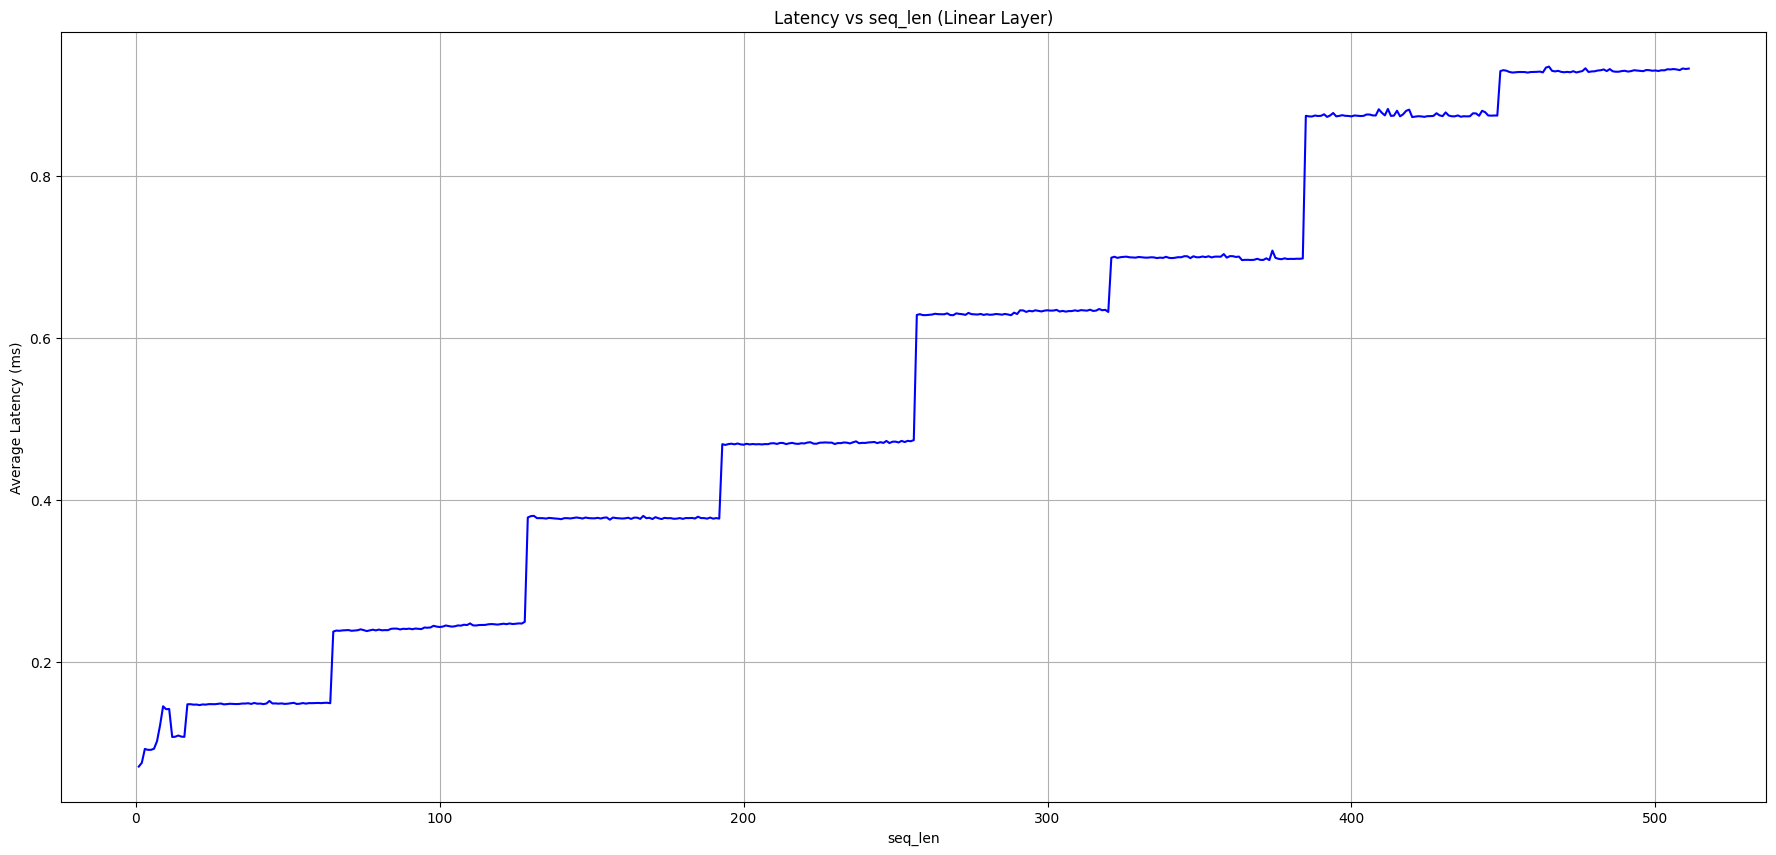

In [18]:
df = df[df[METRIC] < MAX_METRIC_VALUE]
metric = df[METRIC].values
avg_latencies = df["avg_latency_ms"].values


plt.figure(figsize=(22, 10))
plt.plot(metric, avg_latencies, linestyle='-', color='b')
plt.xlabel(METRIC)
plt.ylabel("Average Latency (ms)")
plt.title(f"Latency vs {METRIC} (Linear Layer)")
plt.grid(True)
#plt.savefig(f"{NAME_OUTPUT}.png")
plt.show()


## HIDDEN DIM

In [6]:
CSV_FILE = "./tmp/linear_latency_results_hidden_dims.csv"
METRIC = "hidden_dim"
MAX_METRIC_VALUE = 100_000

df = pd.read_csv(CSV_FILE)
df

,hidden_dim,ffn_dim,seq_len,batch_size,avg_latency_ms
0,1,11008,1,1,0.039891
1,2,11008,1,1,0.032861
2,3,11008,1,1,0.032576
3,4,11008,1,1,0.032797
4,5,11008,1,1,0.035216
...,...,...,...,...,...
16378,16379,11008,1,1,0.241942
16379,16380,11008,1,1,0.242275
16380,16381,11008,1,1,0.242102
16381,16382,11008,1,1,0.242806


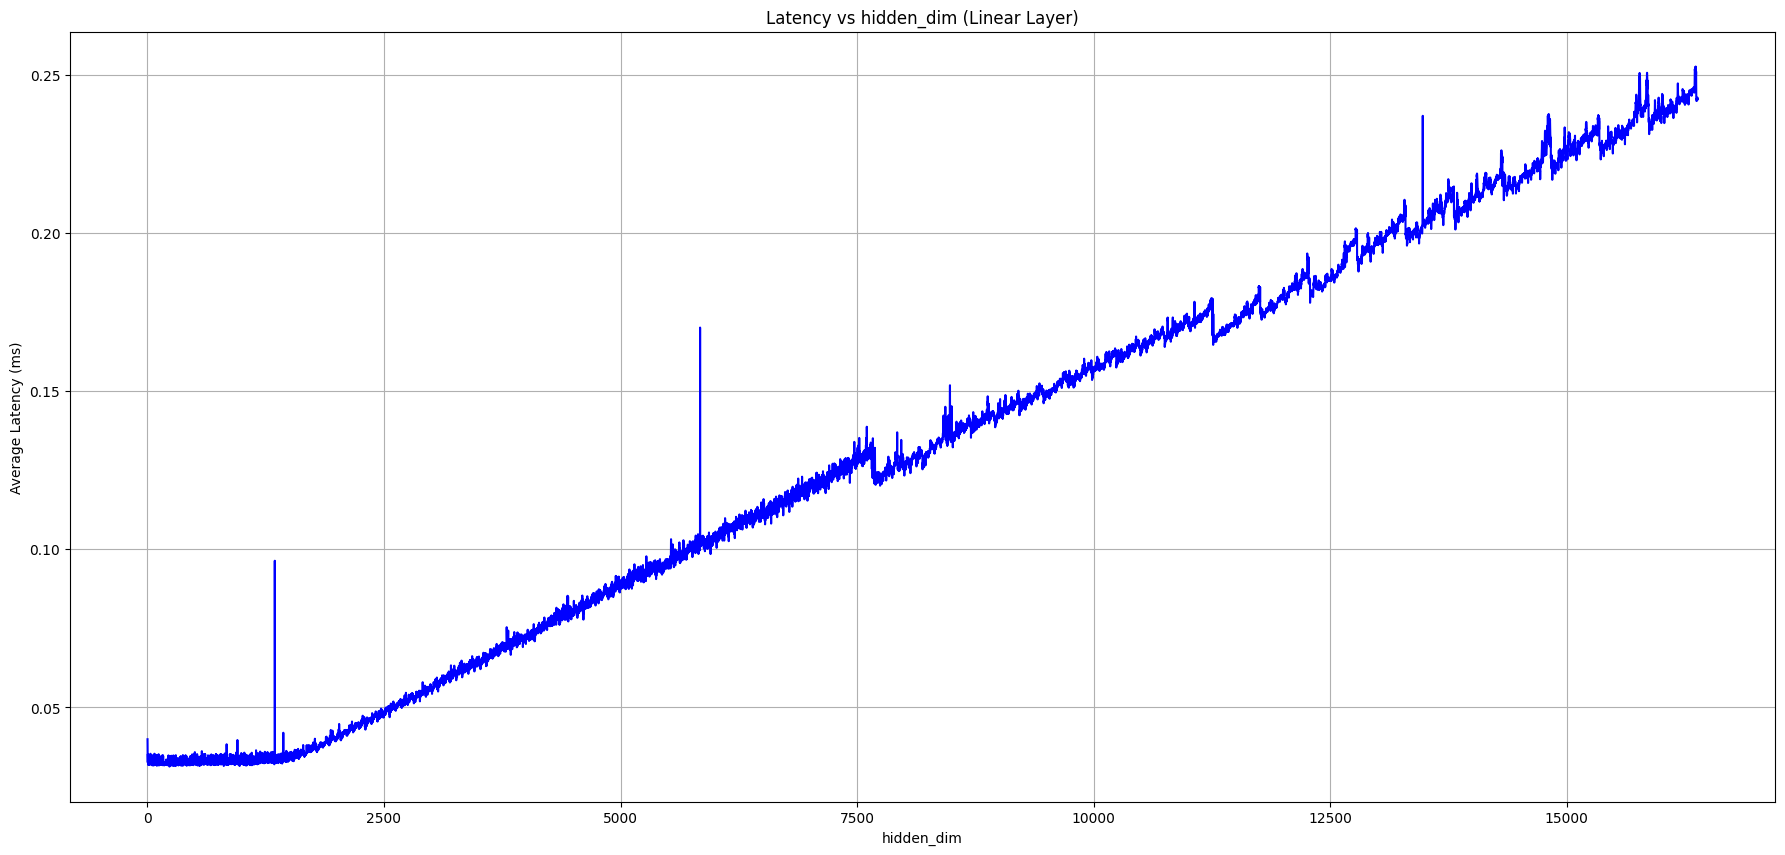

In [7]:
MAX_METRIC_VALUE = 500000

metric = df[METRIC].values
avg_latencies = df["avg_latency_ms"].values


plt.figure(figsize=(22, 10))
plt.plot(metric, avg_latencies, linestyle='-', color='b')
plt.xlabel(METRIC)
plt.ylabel("Average Latency (ms)")
plt.title(f"Latency vs {METRIC} (Linear Layer)")
plt.grid(True)
#plt.savefig(f"{NAME_OUTPUT}.png")
plt.show()


## FFN DIM

In [27]:
CSV_FILE = "./tmp/linear_latency_results_ffn_dims.csv"
METRIC = "ffn_dim"
MAX_METRIC_VALUE = 100_000

df = pd.read_csv(CSV_FILE)
df

,hidden_dim,ffn_dim,seq_len,batch_size,avg_latency_ms
0,4096,1,1,1,0.036688
1,4096,2,1,1,0.034627
2,4096,3,1,1,0.034336
3,4096,4,1,1,0.033814
4,4096,5,1,1,0.034336
...,...,...,...,...,...
65530,4096,65531,1,1,0.346966
65531,4096,65532,1,1,0.346064
65532,4096,65533,1,1,0.346704
65533,4096,65534,1,1,0.346022


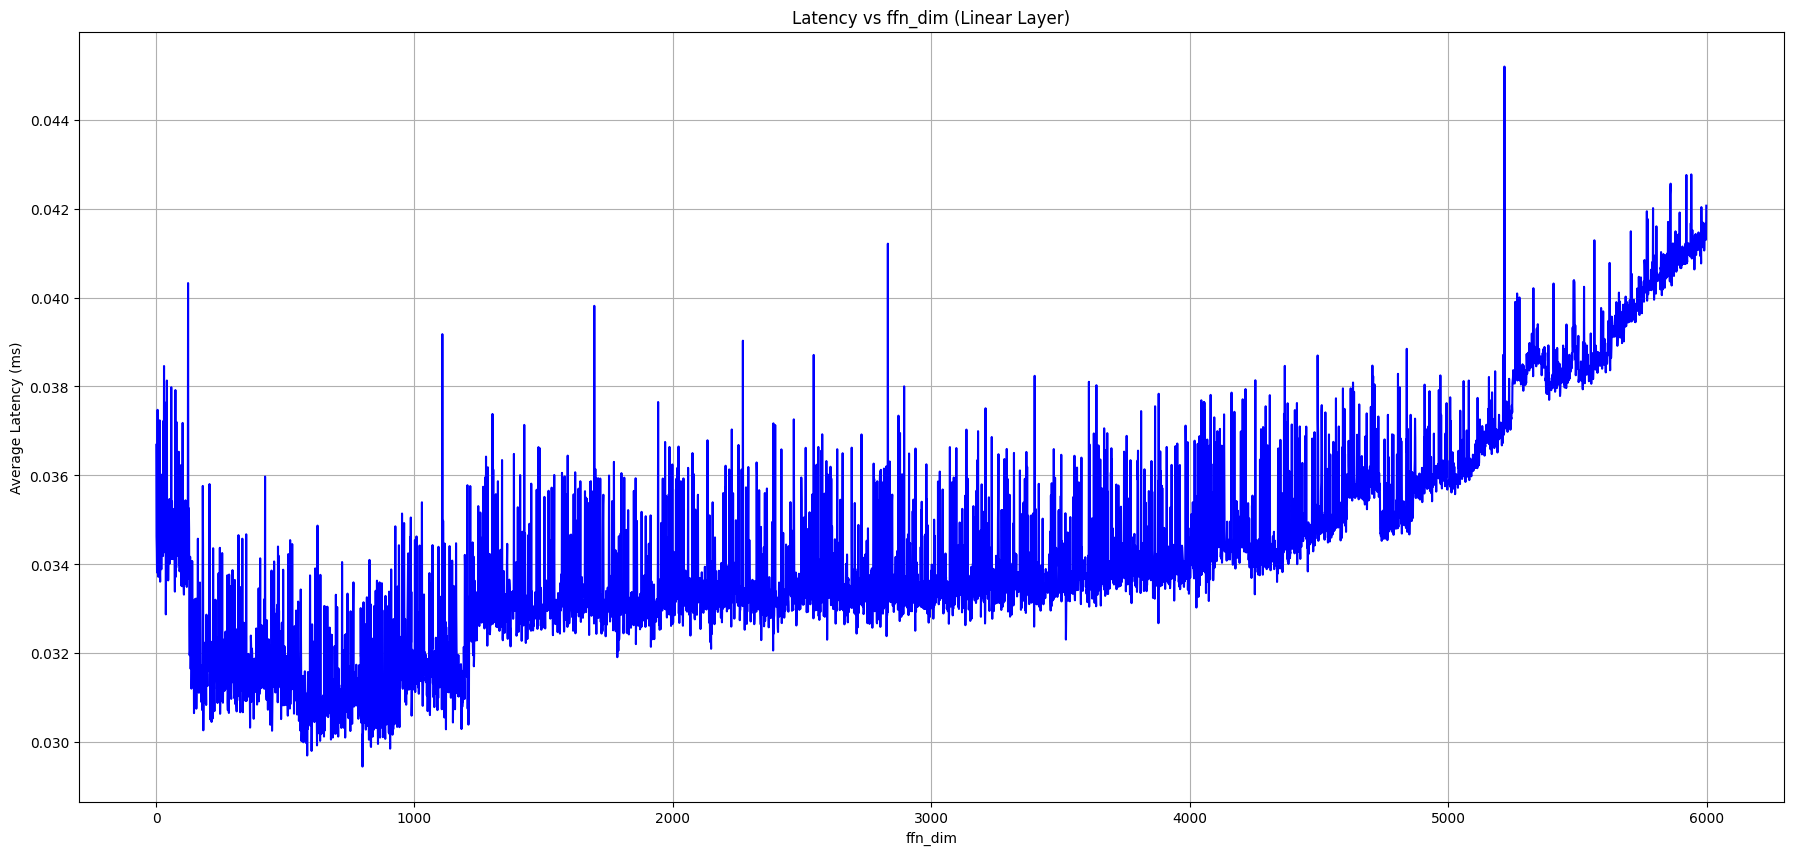

In [28]:
MAX_METRIC_VALUE = 6000
df = df[df[METRIC] < MAX_METRIC_VALUE]
metric = df[METRIC].values
avg_latencies = df["avg_latency_ms"].values


plt.figure(figsize=(22, 10))
plt.plot(metric, avg_latencies, linestyle='-', color='b')
plt.xlabel(METRIC)
plt.ylabel("Average Latency (ms)")
plt.title(f"Latency vs {METRIC} (Linear Layer)")
plt.grid(True)
#plt.savefig(f"{NAME_OUTPUT}.png")
plt.show()


## TODO
- Varing metrics
- See if varitaion of kernel at each jump (plot max used kernel per metric ?)
- mesure energy usage nvml
- Try attention layer


In [1]:
hidden_dim = 4096  # Input dimension
ffn_dim = 11008  # Output dimension
batch_size = 1  # Batch size
seq_len = 1  # Sequence length
dtype_size = 4  # Size of float32 in bytes

total_memory = ((hidden_dim * ffn_dim) + (batch_size * seq_len * hidden_dim) + (batch_size * seq_len * ffn_dim)) * dtype_size
print(f"Total memory required for the model: {total_memory/(1024*1024):.2f} MB")

# L2 cache size 50 MB
l2_cache_size = 50 * 1024 * 1024  # MB to bytes

max_hidden_dim = ((l2_cache_size / dtype_size) - (batch_size * seq_len * ffn_dim)) / (ffn_dim + batch_size * seq_len)
print(f"Maximum hidden dimension that fits in L2 cache: {max_hidden_dim:.2f}")

max_ffn_dim = ((l2_cache_size / dtype_size) - (batch_size * seq_len * hidden_dim)) / (hidden_dim + batch_size * seq_len)
print(f"Maximum FFN dimension that fits in L2 cache: {max_ffn_dim:.2f}")

max_batch_size = (l2_cache_size / dtype_size - (hidden_dim * ffn_dim)) / (seq_len * (hidden_dim + ffn_dim))
print(f"Maximum batch size that fits in L2 cache: {max_batch_size:.2f}")

max_seq_len = (l2_cache_size / dtype_size - (hidden_dim * ffn_dim)) / (batch_size * (hidden_dim + ffn_dim))
print(f"Maximum sequence length that fits in L2 cache: {max_seq_len:.2f}")



Total memory required for the model: 172.06 MB
Maximum hidden dimension that fits in L2 cache: 1189.59
Maximum FFN dimension that fits in L2 cache: 3198.22
Maximum batch size that fits in L2 cache: -2117.42
Maximum sequence length that fits in L2 cache: -2117.42


In [2]:
max_hidden_dim_found = 1500  # Input dimension
max_ffn_dim_found = 4100  # Output dimension
batch_size = 1  # Batch size
seq_len = 1  # Sequence length
dtype_size = 4  # Size of float32 in bytes

total_memory_hidden_dim = ((max_hidden_dim_found * ffn_dim) + (batch_size * seq_len * max_hidden_dim_found) + (batch_size * seq_len * ffn_dim)) * dtype_size
total_memory_ffn_dim = ((hidden_dim * max_ffn_dim_found) + (batch_size * seq_len * hidden_dim) + (batch_size * seq_len * max_ffn_dim_found)) * dtype_size
print(f"Max cached memory according to hidden dim : {total_memory_hidden_dim/(1024*1024):.2f} MB")
print(f"Max cached memory according to ffn dim : {total_memory_ffn_dim/(1024*1024):.2f} MB")




Max cached memory according to hidden dim : 63.04 MB
Max cached memory according to ffn dim : 64.09 MB


In [3]:
hidden_dim = 4096  # Input dimension
ffn_dim = 11008  # Output dimension
batch_size = 1  # Batch size
seq_len = 1  # Sequence length
dtype_size = 4  # Size of float32 in bytes

total_memory_cached = (hidden_dim * ffn_dim) * dtype_size
print(f"Total memory required for the model: {total_memory/(1024*1024):.2f} MB")

# L2 cache size 50 MB
l2_cache_size = 50 * 1024 * 1024  # MB to bytes

max_hidden_dim = l2_cache_size / (ffn_dim * dtype_size)
print(f"Maximum hidden dimension that fits in L2 cache: {max_hidden_dim:.2f}")

max_ffn_dim = l2_cache_size / (hidden_dim * dtype_size)
print(f"Maximum FFN dimension that fits in L2 cache: {max_ffn_dim:.2f}")




Total memory required for the model: 172.06 MB
Maximum hidden dimension that fits in L2 cache: 1190.70
Maximum FFN dimension that fits in L2 cache: 3200.00


In [5]:
50 *1024*1024 / (4096 * 4)  # 45 MB L2 cache size, hidden_dim = 4096, dtype_size = 4 bytes

3200.0

In [7]:
45 *1024*1024 / (11008 * 4)

1071.6279069767443